In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Preprocessing

In [2]:
df = pd.read_csv("Students.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

In [4]:
df.size

50

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [6]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [8]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


## Univariate Analysis

Text(0, 0.5, 'Frequency')

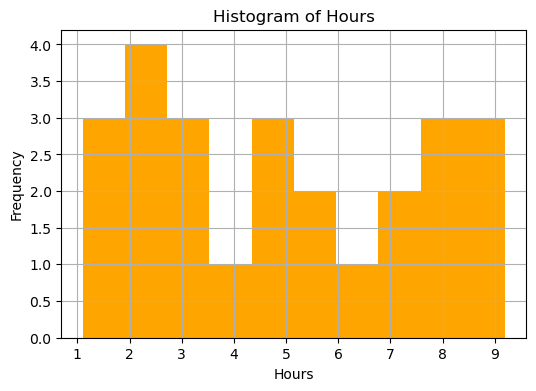

In [23]:
plt.figure(figsize=(6,4))
df["Hours"].hist(bins = 10, color = 'orange')
plt.title("Histogram of Hours")
plt.xlabel("Hours")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

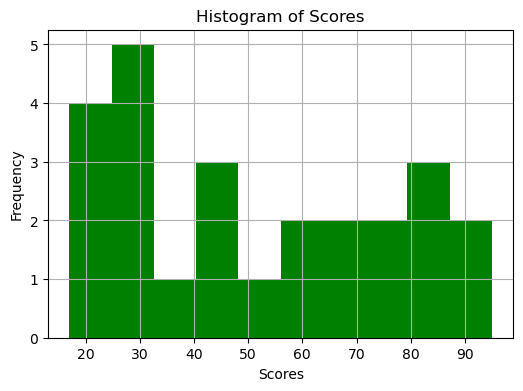

In [24]:
plt.figure(figsize=(6,4))
df["Scores"].hist(bins = 10, color = 'green')
plt.title("Histogram of Scores")
plt.xlabel("Scores")
plt.ylabel("Frequency")

# Bivariate Analysis

Text(0.5, 1.0, 'Scatter Plot between Hours and Scores')

<Figure size 300x300 with 0 Axes>

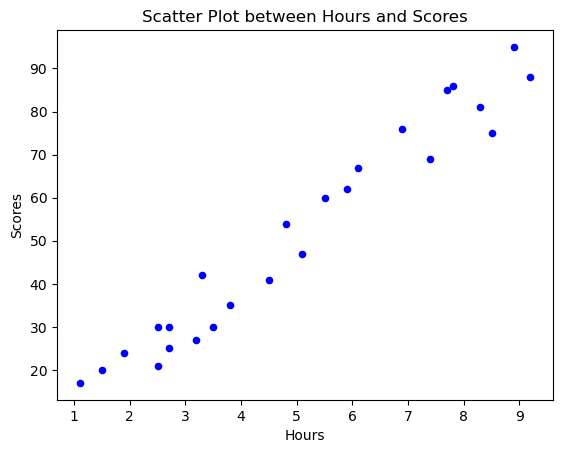

In [31]:
plt.figure(figsize=(3,3))
df.plot.scatter(x='Hours', y='Scores', c='blue', marker='o')
plt.title("Scatter Plot between Hours and Scores")

# Model Building

In [36]:
X = df.iloc[:,:1]
y = df.iloc[:, 1]

In [37]:
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [38]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
model = LinearRegression()

In [43]:
model.fit(X_train, y_train)

LinearRegression()

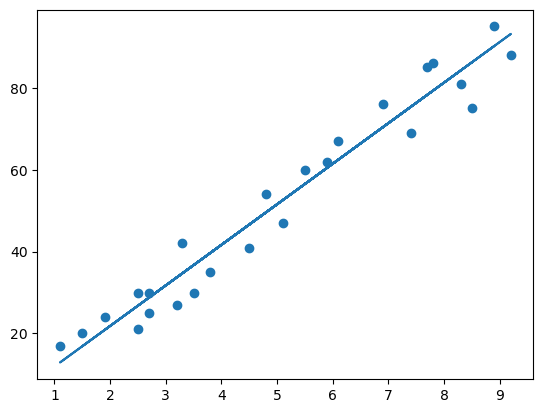

In [47]:
line = model.coef_*X+ model.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [48]:
y_pred = model.predict(X_test)

In [49]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [51]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [52]:
r2_score(y_test,y_pred)

0.9454906892105356

In [53]:
mean_absolute_error(y_test,y_pred)

4.183859899002975

In [54]:
mean_squared_error(y_test, y_pred)

21.5987693072174

# Predicting Score when a students studies 9.25 hrs/day.

In [56]:
hours = np.array([[9.25]])
y_pred1 = model.predict(hours)

C:\Users\ASUS\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [57]:
y_pred1

array([93.69173249])

In [64]:
print("Predicted Score:",y_pred1[0])

Predicted Score: 93.69173248737538
